# **Carlos Arturo Gómez Jiménez**
**cc. 1020808609**

**IU Digital De Antioquia**

# **Conexión A GitHUB**

In [19]:
from git import Repo

local_repo_path = "/content/drive/MyDrive/7_SEPTIMO_SEMESTRE/Programacion_para_analisis_datos"

# Inicializar el repositorio Git si no existe
repo = Repo.init(local_repo_path)
print("Repositorio Git inicializado en:", local_repo_path)

Repositorio Git inicializado en: /content/drive/MyDrive/7_SEPTIMO_SEMESTRE/Programacion_para_analisis_datos


In [ ]:
# Agregar el repositorio remoto
origin = repo.create_remote('origin', 'https://github.com/cargeo95/ProgarmacionAplicada.git')
print("Repositorio remoto agregado.")

In [21]:
from git import Repo
import os

Repo_URL = "https://github.com/cargeo95/ProgarmacionAplicada.git"
local_repo_path = "/content/drive/MyDrive/7_SEPTIMO_SEMESTRE/Programacion_para_analisis_datos"

# Verifica si el repositorio ya existe en la carpeta local
if os.path.exists(local_repo_path):
    try:
        # Abre el repositorio existente
        repo = Repo(local_repo_path)
        print("El repositorio ya existe")

        # Verificar que el repositorio tiene remotos
        remotes = repo.remotes
        if remotes:
            # Accede al primer remoto (generalmente origin)
            origin = remotes[0]  # Accede al primer remoto
            print(f"Remoto encontrado: {origin.name}")

            # Verificar si la rama local tiene un upstream configurado
            if repo.active_branch.tracking_branch() is None:
                print("Configurando la rama local para rastrear origin/master")
                repo.git.branch('--set-upstream-to=origin/master', 'master')

            # Añadir cambios al staging area (preparar para commit)
            repo.git.add(A=True)  # Esto agrega todos los archivos modificados o nuevos

            # Realiza el commit con un mensaje
            repo.index.commit("Actualización de datos del proyecto")

            # Empujar los cambios al repositorio remoto en GitHub
            origin.push()  # Sube los cambios
            print("Cambios enviados al repositorio remoto")
        else:
            print("No se encontraron remotos configurados.")
    except Exception as e:
        print(f"Error: {e}")
else:
    print("El directorio no existe o no es un repositorio Git válido.")


El repositorio ya existe
Remoto encontrado: origin
Configurando la rama local para rastrear origin/master
Error: Cmd('git') failed due to: exit code(1)
  cmdline: git branch --set-upstream-to=origin/master master
  stderr: 'error: the requested upstream branch 'origin/master' does not exist
hint: 
hint: If you are planning on basing your work on an upstream
hint: branch that already exists at the remote, you may need to
hint: run "git fetch" to retrieve it.
hint: 
hint: If you are planning to push out a new local branch that
hint: will track its remote counterpart, you may want to use
hint: "git push -u" to set the upstream config as you push.'


## **Descripción de la página y artículo a analizar**

El propósito de este documento es realizar un análisis detallado de los precios de productos en un sitio de comercio electrónico mediante técnicas de scraping de datos. El scraping permite extraer información directamente de páginas web, facilitando la recolección de datos relevantes para la investigación de mercado. Esta metodología es especialmente útil en el contexto del comercio electrónico, donde los precios y las ofertas cambian constantemente, y donde el análisis de estos datos puede proporcionar información valiosa sobre la competitividad y la estructura de precios de una empresa.


Mediante el análisis de los precios de productos específicos, es posible identificar patrones y tendencias, lo cual ayuda a comprender mejor la dinámica del mercado y las estrategias de precios utilizadas. Este tipo de análisis es fundamental para evaluar la posición de una empresa en el mercado y para detectar oportunidades de ajuste en sus estrategias comerciales y de precios, en beneficio de su competitividad.

# **Objetivos**

Analizar la distribución de precios de los productos en la página de comercio para identificar rangos de precio comunes y valores atípicos.


Evaluar la competencia en el mercado a través de la comparación de precios de productos similares en diferentes rangos.


Identificar posibles estrategias de precios de la empresa, comprendiendo cómo los productos se agrupan en ciertos intervalos de precio.


Determinar la existencia de patrones en los precios que sugieran diferencias en calidad, popularidad o estrategia de marketing.

# **Metodología empleada de scraping**

**Herramientas y librerías utilizadas:**

Se utilizó Python junto con librerías específicas para scraping, como requests, BeautifulSoup, y Selenium. Estas herramientas permitieron acceder y extraer información estructurada del sitio web de Like Me.

**Proceso de scraping:**

Acceso a la página: Se accedió a la sección específica de crop tops para mujeres.
Extracción de datos: Se recolectaron datos sobre el nombre del producto, el precio y el enlace de la imagen.
Almacenamiento de datos: Los datos fueron almacenados en un DataFrame de Pandas para su posterior análisis.

In [ ]:
!pip install scrapy
!pip install w3lib
!pip install twisted
!pip install crochet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
import scrapy
from crochet import setup, wait_for
from scrapy.crawler import CrawlerRunner
from scrapy import signals
from scrapy.signalmanager import dispatcher
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configura Crochet
setup()

# Definir una lista para almacenar los resultados
scraped_data = []

# Define el Spider de Scrapy
class MiSpider(scrapy.Spider):
    name = "mi_spider"
    start_urls = ["https://www.likeme.com.co/mujer/crop-tops.html"]

    def parse(self, response):
        # Extrae los elementos deseados (ajusta los selectores CSS a los de la página)
        for product in response.css("div.product-item-info"):
            name = product.css("a.product-item-link::text").get().strip()
            price = product.css("span.price::text").get()
            image = product.css("img.product-image-photo::attr(src)").get()

            # Guarda los datos en el array global
            scraped_data.append({
                'name': name,
                'price': price,
                'image': image
            })

# Define una función para ejecutar el Spider
@wait_for(20)  # Define un tiempo máximo de espera para el spider
def run_spider():
    # Limpiar los resultados anteriores
    scraped_data.clear()

    # Crear un runner para el Spider
    runner = CrawlerRunner()

    # Conectar una señal para saber cuando el crawler termina
    dispatcher.connect(lambda: reactor.stop(), signal=signals.spider_closed)

    # Ejecutar el spider
    d = runner.crawl(MiSpider)
    return d

# Ejecutar el spider
run_spider()

# Mostrar los datos extraídos
scraped_data


It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting for information on how to handle this deprecation.


[{'name': '',
  'price': '$\xa023.999',
  'image': 'https://www.likeme.com.co/media/catalog/product/r/h/rh618140_1_1.jpg?quality=80&bg-color=255,255,255&fit=bounds&height=600&width=400&canvas=400:600'},
 {'name': '',
  'price': '$\xa029.599',
  'image': 'https://www.likeme.com.co/media/catalog/product/r/h/rh618110_1_1.jpg?quality=80&bg-color=255,255,255&fit=bounds&height=600&width=400&canvas=400:600'},
 {'name': '',
  'price': '$\xa037.599',
  'image': 'https://www.likeme.com.co/media/catalog/product/p/a/pacifika620189_1.jpg?quality=80&bg-color=255,255,255&fit=bounds&height=600&width=400&canvas=400:600'},
 {'name': '',
  'price': '$\xa022.999',
  'image': 'https://www.likeme.com.co/media/catalog/product/c/a/carmel619319_1.jpg?quality=80&bg-color=255,255,255&fit=bounds&height=600&width=400&canvas=400:600'},
 {'name': '',
  'price': '$\xa019.999',
  'image': 'https://www.likeme.com.co/media/catalog/product/r/h/rh619318_1.jpg?quality=80&bg-color=255,255,255&fit=bounds&height=600&width=400

In [ ]:
scraped_data_df = pd.DataFrame(scraped_data)
scraped_data_df

,name,price,image
0,,$ 23.999,https://www.likeme.com.co/media/catalog/produc...
1,,$ 29.599,https://www.likeme.com.co/media/catalog/produc...
2,,$ 37.599,https://www.likeme.com.co/media/catalog/produc...
3,,$ 22.999,https://www.likeme.com.co/media/catalog/produc...
4,,$ 19.999,https://www.likeme.com.co/media/catalog/produc...
5,,$ 29.999,https://www.likeme.com.co/media/catalog/produc...
6,,$ 29.999,https://www.likeme.com.co/media/catalog/produc...
7,,$ 19.999,https://www.likeme.com.co/media/catalog/produc...
8,,$ 21.999,https://www.likeme.com.co/media/catalog/produc...
9,,$ 36.999,https://www.likeme.com.co/media/catalog/produc...


In [ ]:
# Limpiar y convertir la columna 'price' a tipo numérico
scraped_data_df['price'] = scraped_data_df['price'].str.replace('$', '').str.replace(' ', '').str.replace('.', '').astype(float)
# Calcular estadísticas descriptivas
scraped_data_df['price'].describe()

,price
count,39.000000
mean,23952.846154
std,6788.606793
min,12999.000000
25%,19999.000000
50%,19999.000000
75%,27799.000000
max,39999.000000


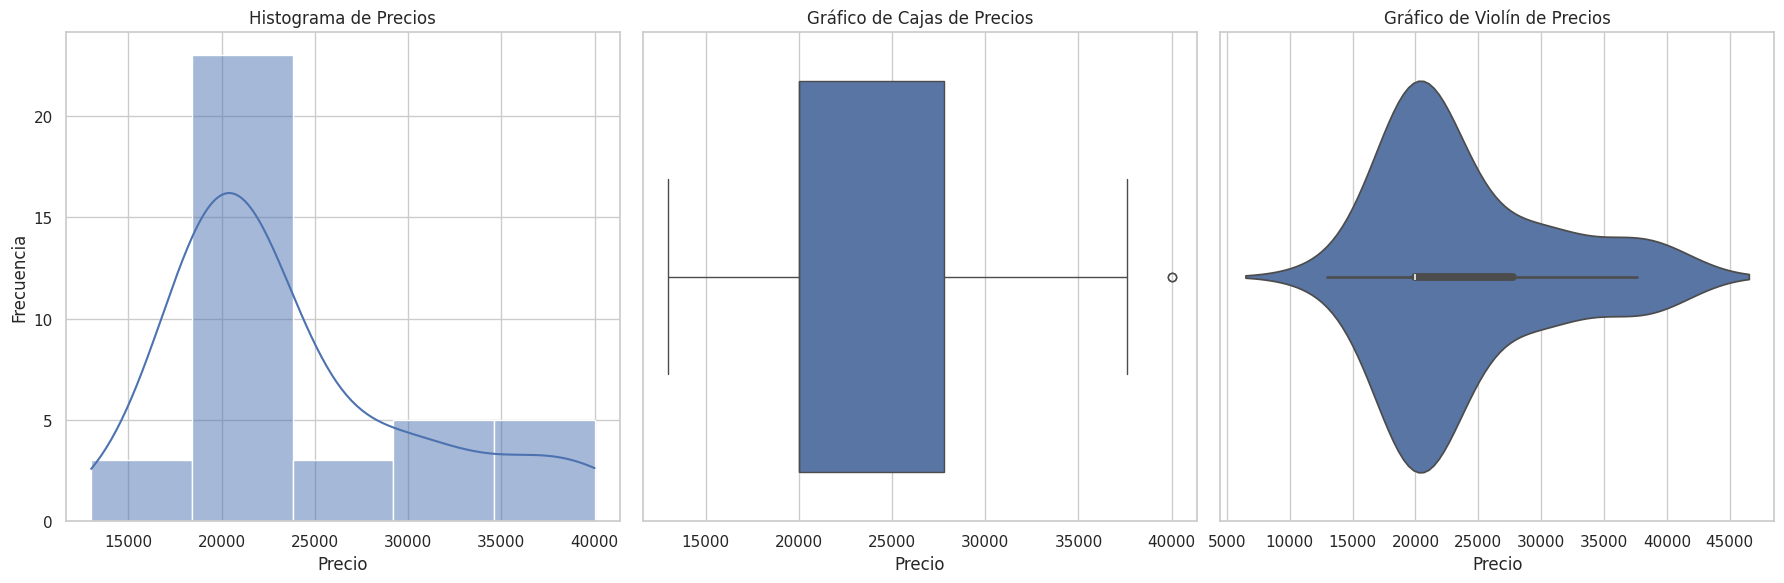

In [ ]:
# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Crear subplots para los diferentes gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma de precios
sns.histplot(scraped_data_df['price'], bins=5, kde=True, ax=axes[0])
axes[0].set_title('Histograma de Precios')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')

# Gráfico de cajas (box plot)
sns.boxplot(x=scraped_data_df['price'], ax=axes[1])
axes[1].set_title('Gráfico de Cajas de Precios')
axes[1].set_xlabel('Precio')

# Gráfico de violín
sns.violinplot(x=scraped_data_df['price'], ax=axes[2])
axes[2].set_title('Gráfico de Violín de Precios')
axes[2].set_xlabel('Precio')

# Mostrar gráficos
plt.tight_layout()
plt.show()

# **Resultados**

**Histograma:**

La mayoría de los precios se encuentran en el rango de los 20,000 a 25,000, lo cual se observa en el pico del histograma. Esto sugiere que los productos en tu conjunto de datos tienden a tener un precio cercano a este rango.
La curva KDE (línea suavizada) muestra que la distribución de los precios está sesgada hacia valores más bajos, pero con una cola que se extiende hacia precios más altos, indicando algunos valores atípicos o precios elevados en comparación con el grupo principal.


**Gráfico de Cajas (Box Plot):**

La mediana se encuentra cerca de los 25,000, lo que confirma que la mayoría de los precios están alrededor de este valor.
Se observa un valor atípico en el extremo derecho del gráfico, lo que indica que hay al menos un producto con un precio significativamente mayor al resto.
El rango intercuartílico (la distancia entre el primer y tercer cuartil) también es amplio, lo que sugiere una dispersión considerable en los precios.


**Gráfico de Violín:**

La forma del gráfico de violín es similar a la distribución observada en el histograma, con una concentración alta en la región de 20,000 a 25,000.
También muestra simetría alrededor de la mediana, con una disminución gradual hacia los valores extremos, aunque existen valores fuera de la concentración principal.